# Correlations

source (https://blogs.sas.com/content/iml/2012/02/08/use-the-cholesky-transformation-to-correlate-and-uncorrelate-variables.html)

Given a covariance matrix, $Σ$, it can be factored uniquely into a product $Σ=U^{T}U$, where $U$ is an upper triangular matrix with positive diagonal entries and the superscript denotes matrix transpose. The matrix $U$ is the Cholesky (or "square root") matrix. Some people (including me) prefer to work with lower triangular matrices. If you define $L=U^{T}$, then $Σ=LL^{T}$. 

Geometrically, the Cholesky matrix transforms uncorrelated variables into variables whose variances and covariances are given by $Σ$. In particular, if you generate $p$ standard normal variates, the Cholesky transformation maps the variables into variables for the multivariate normal distribution with covariance matrix $Σ$ and centered at the origin (denoted $MVN(0, Σ)$).

## The Cholesky Transformation: The Simple Case

Suppose that you want to generate multivariate normal data that are uncorrelated, but have non-unit variance. The covariance matrix for this situation is the diagonal matrix of variances: 

$$Σ = diag(σ^{2}_{1},...,σ^{2}_{p})$$. 

The square root of $Σ$ is the diagonal matrix D that consists of the standard deviations: $Σ = D^{T}D$ where $D = diag(σ_{1},...,σ_{p})$. 

Geometrically, the D matrix scales each coordinate direction independently of the other directions.This is shown in the following image. The $X$ axis is scaled by a factor of 3, whereas the $Y$ axis is unchanged (scale factor of 1). The transformation $D$ is $diag(3,1)$, which corresponds to a covariance matrix of $diag(9,1)$. If you think of the circles in the top image as being probability contours for the multivariate distribution $MVN(0, I)$, then the bottom shows the corresponding probability ellipses for the distribution $MVN(0, D)$.

![image](images/choleskytransform1.png)

## The General Cholesky Transformation Correlates Variables

In the general case, a covariance matrix contains off-diagonal elements. The geometry of the Cholesky transformation is similar to the "pure scaling" case shown previously, but the transformation also rotates and shears the top image.

Computing a Cholesky matrix for a general covariance matrix is not as simple as for a diagonal covariance matrix. 

You can use the Cholesky matrix to create correlations among random variables. For example, suppose that $X$ and $Y$ are independent standard normal variables. The matrix $U$ (or its transpose, $L=U^{T}$) can be used to create new variables $Z$ and $W$ such that the covariance of $Z$ and $W$ equals $Σ$. That is, each column is a point $(x,y)$. (Usually the variables form the columns, but transposing $xy$ makes the linear algebra easier.) The statements then map each $(x,y)$ point to a new point, $(z,w)$, and compute the sample covariance of the $Z$ and $W$ variables. 

The following graph shows the geometry of the transformation in terms of the data and in terms of probability ellipses. The top graph is a scatter plot of the $X$ and $Y$ variables. Notice that they are uncorrelated and that the probability ellipses are circles. The bottom graph is a scatter plot of the $Z$ and $W$ variables. Notice that they are correlated and the probability contours are ellipses that are tilted with respect to the coordinate axes. The bottom graph is the transformation under $L$ of points and circles in the top graph.

![image](images/choleskytransform2.png)

### Python example: Cholesky decompositon


In [1]:
import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

A  = scipy.array([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]])
L  = scipy.linalg.cholesky(A, lower=True)
LT = scipy.linalg.cholesky(A, lower=False)

print( "A:")
pprint.pprint(A)

print( "L:")
pprint.pprint(L)

print( "LT:")
pprint.pprint(LT)

A:
array([[ 6,  3,  4,  8],
       [ 3,  6,  5,  1],
       [ 4,  5, 10,  7],
       [ 8,  1,  7, 25]])
L:
array([[ 2.44948974,  0.        ,  0.        ,  0.        ],
       [ 1.22474487,  2.12132034,  0.        ,  0.        ],
       [ 1.63299316,  1.41421356,  2.30940108,  0.        ],
       [ 3.26598632, -1.41421356,  1.58771324,  3.13249102]])
LT:
array([[ 2.44948974,  1.22474487,  1.63299316,  3.26598632],
       [ 0.        ,  2.12132034,  1.41421356, -1.41421356],
       [ 0.        ,  0.        ,  2.30940108,  1.58771324],
       [ 0.        ,  0.        ,  0.        ,  3.13249102]])


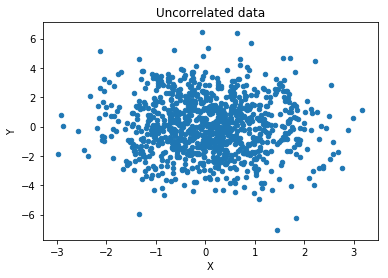

In [9]:
# Generate two inpdendent, Gaussian-distributed random numbers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

mu_x    = 0.
mu_y    = 0.
sigma_x = 1.
sigma_y = 2.

X = np.random.normal(mu_x, sigma_x, 1000)
Y = np.random.normal(mu_y, sigma_y, 1000)

df = pd.DataFrame({'X': X, 'Y': Y})

df.plot(x='X', y='Y', kind='scatter', title='Uncorrelated data')

In [19]:
# Get the correlation between values
corr = df.corr()
corr

,X,Y
X,1.000000,-0.043045
Y,-0.043045,1.000000


In [18]:
# Get the covariance between values
cov = df.cov()
cov

,X,Y
X,0.971345,-0.081966
Y,-0.081966,3.732884


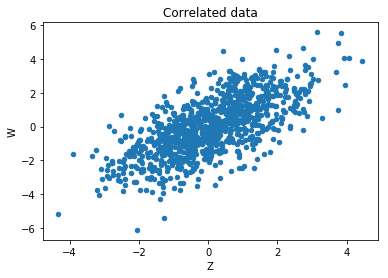

In [23]:
# Create desired correlation and transform variables X,Y to correlated variables Z,W

new_corr = pd.DataFrame({'X' : [1,0.5], 'Y' : [0.5,1]},index={'X','Y'})
L  = scipy.linalg.cholesky(new_corr, lower=True)
LT = scipy.linalg.cholesky(new_corr, lower=False)

df_transformed = df.dot(L)
df_transformed.columns=['Z', 'W']
df_transformed.plot(kind='scatter',x='Z',y='W',title='Correlated data')


In [20]:
# Get the correlation between the correlated values
new_corr = df_transformed.corr()
new_corr

,Z,W
Z,1.000000,0.684137
W,0.684137,1.000000


In [21]:
# Get the covariance between the correlated values
new_cov = df_transformed.cov()
new_cov

,Z,W
Z,1.822600,1.545402
W,1.545402,2.799663


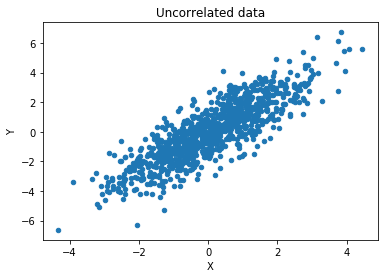

In [28]:
# Reverse the correlation of correlated data
df_untransformed = df_transformed.dot(LT)
df_untransformed.columns=['X', 'Y']
df_untransformed.plot(kind='scatter',x='X',y='Y',title='Uncorrelated data')

In [33]:
# Source: https://stats.stackexchange.com/questions/160054/how-to-use-the-cholesky-decomposition-or-an-alternative-for-correlated-data-si

import numpy as np

no_obs = 1000             # Number of observations per column
means = [1, 2, 3]         # Mean values of each column
no_cols = 3               # Number of columns

sds = [1, 2, 3]           # SD of each column
sd = np.diag(sds)         # SD in a diagonal matrix for later operations

observations = np.random.normal(0, 1, (no_cols, no_obs)) # Rd draws N(0,1) in [3 x 1,000]

cor_matrix = np.array([[1.0, 0.6, 0.9],
                       [0.6, 1.0, 0.5],
                       [0.9, 0.5, 1.0]])          # The desired correlation matrix [3 x 3]

cov_matrix = np.dot(sd, np.dot(cor_matrix, sd))   # The covariance matrix

Chol = np.linalg.cholesky(cov_matrix)             # Cholesky decomposition

print('Cholesky decomposition: \n', Chol)

sam_eq_mean = Chol .dot(observations)             # Generating random MVN (0, cov_matrix)

s = sam_eq_mean.transpose() + means               # Adding the means column wise
samples = s.transpose()                           # Transposing back

print('Correlation cross-check: \n', np.corrcoef(samples)) # Checking correlation consistency.



Cholesky decomposition: 
 [[ 1.          0.          0.        ]
 [ 1.2         1.6         0.        ]
 [ 2.7        -0.15        1.29903811]]
Correlation cross-check: 
 [[ 1.          0.57417163  0.89857906]
 [ 0.57417163  1.          0.45424584]
 [ 0.89857906  0.45424584  1.        ]]
